# GPU与CPU：计算硬件与大模型训练

## 💡 这节课会带给你

1.计算机硬件基础
  - 什么是CPU？
  - 什么是GPU？
  - GPU vs CPU 类型解析

2. 我们为什么要使用GPU？
  - CUDA®：通用并行计算平台和程序模型
  - A Scalable Programming Model
    
3. GPU在大模型训练中的应用
  - 张量的介绍
  - 查看设备GPU信息
  - 让张量在GPU与CPU之间移动
  - Python中使用GPU加速模型
  - 创建支持多个GPU数据并行的模型

4. PyTorch项目GPU加速实例
 
5. CPU在大模型训练中的应用
 
6. GPU硬件选择策略

开始上课！


# 一、计算硬件基础

## 1. 什么是 CPU？


CPU（中央处理器）是计算机系统中最核心的组件之一，负责执行几乎所有程序运行所需的指令。作为一种通用处理器，旨在处理各种不同类型的任务，从操作系统的运行，到应用程序的执行，再到复杂的计算、文档编辑、播放电影和音乐、网页浏览等。



现代 CPU 通常拥有多个处理核心，每个核心都可以独立处理指令，从而提高多任务处理的能力。这种多核设计使得 CPU 可以在一定程度上同时处理多个任务，虽然每个任务的执行仍然是顺序完成的。



需要注意的是，CPU 的处理方式以“顺序处理”为主。也就是说，CPU 会逐步、一条接一条地执行指令，这与并行处理不同。虽然多核技术和超线程技术可以在一定程度上缓解这种顺序处理的局限，但它并不是为大规模并行计算设计的。相比于能够一次处理大量数据的图形处理器（GPU），CPU 更适合处理复杂且需要精确计算的任务。



在 CPU 架构中，有几个关键的标准组件，它们共同协作，确保中央处理器能够高效完成各种计算任务。这些组件包括内核、缓存、内存管理单元（MMU）以及 CPU 时钟和控制单元等。计算机系统中最核心的组件之一，负责执行几乎所有程序运行所需的指令。作为一种通用处理器，旨在处理各种不同类型的任务，从操作系统的运行，到应用程序的执行，再到复杂的计算、文档编辑、播放电影和音乐、网页浏览等。


现代 CPU 通常拥有多个处理核心，每个核心都可以独立处理指令，从而提高多任务处理的能力。这种多核设计使得 CPU 可以在一定程度上同时处理多个任务，虽然每个任务的执行仍然是顺序完成的。


需要注意的是，CPU 的处理方式以“顺序处理”为主。也就是说，CPU 会逐步、一条接一条地执行指令，这与并行处理不同。虽然多核技术和超线程技术可以在一定程度上缓解这种顺序处理的局限，但它并不是为大规模并行计算设计的。相比于能够一次处理大量数据的图形处理器（GPU），CPU 更适合处理复杂且需要精确计算的任务。


在 CPU 架构中，有几个关键的标准组件，它们共同协作，确保中央处理器能够高效完成各种计算任务。这些组件包括内核、缓存、内存管理单元（MMU）以及 CPU 时钟和控制单元等。

![CPU架构图](1.jpeg)e



所有这些组件共同协作，创建了一个能够高效执行多任务并行的处理环境。当 CPU 时钟驱动核心活动时，多个核心之间以极高的速度切换任务，从而使得 CPU 能够在数百个不同的任务之间每秒进行快速切换。例如，CPU可 以在后台处理文件操作的同时，运行应用程序、管理网络连接，并保持桌面显示的流畅运行。


  总的来说，CPU（中央处理器）是整个计算机系统的核心，协调和管理所有计算任务。从数据输入到最终的输出，每一个步骤都依赖于 CPU 的指令处理和计算能力。无论是打开应用程序、运行复杂的模拟、编译软件，还是处理图形、视频和音频，CPU 都是确保系统能够高效运行的关键角色。

##  2. 什么是 GPU ？

   GPU全称是Graphics Processing Unit，图形处理单元。它的功能最初与名字一致，是专门用于绘制图像和处理图元数据的特定芯片，后来渐渐加入了其它很多功能。
    
  GPU 的架构设计非常独特，由成百上千个小型处理单元组成，每个处理单元能够独立并行执行指令。这种高度并行的处理能力使 GPU 能够同时处理海量数据，这也是其与多核 CPU 的相似之处。CPU 虽然也有多核设计，但每个核心的任务通常是串行执行的。而 GPU 的每个小型处理单元（通常称为“流处理器”或“CUDA 核心”）则可以相互并行执行不同的指令集，使得 GPU 能够在短时间内处理大量计算任务。

![GPU架构图](gpu.jpeg)

![GPU架构图](2.jpeg)

在图形渲染领域，GPU 的并行计算能力展现得尤为明显。渲染一个复杂的 3D 场景需要进行大量的数学计算，这些计算通常涉及到诸如光线追踪、阴影处理、纹理贴图和颜色渲染等高复杂度的操作。每个屏幕上显示的画面都由数百甚至数千个几何多边形组成，而每个多边形都有其独立的颜色、光照反射、运动轨迹等物理特性。所有这些计算都需要在极短的时间内完成，尤其是在图形密集型应用（如视频游戏、3D动画制作等）中，每秒钟画面的刷新和渲染速度要求非常高。

CPU（中央处理器）虽然在逻辑处理和一般计算任务上表现出色，但它并非为这种海量并行处理设计的。图形渲染的复杂性超出了 CPU 的处理能力，因为它必须在极短的时间内完成大量涉及数学、几何和光线计算的操作。为了保证游戏、影视特效、虚拟现实等应用能够流畅运行，GPU 通过其强大的并行计算架构接管了这些复杂的任务。务。

## 3. GPU vs CPU 类型解析

###  CPU 类型

CPU（中央处理器） 是计算机的“大脑”，负责执行各种指令。目前市场上主要有以下几种类型的 CPU，具体可参考：
- **英特尔酷睿（Intel Core）处理器**： 作为 PC 市场的老牌霸主，英特尔酷睿系列处理器以其出色的性能和广泛的兼容性而闻名。无论是办公、娱乐还是专业创作，酷睿处理器都能胜任。

- **AMD Ryzen 处理器**： AMD 的 Ryzen 系列处理器凭借出色的性价比和多核性能，近年来迅速崛起。在游戏、内容创作等领域，Ryzen 处理器与酷睿处理器不相上下，甚至在某些方面表现更佳。

- **ARM 处理器**： ARM 处理器以低功耗、高性能的特点而著称，广泛应用于智能手机、平板电脑、物联网设备等移动设备中。ARM 架构的能效比使其成为移动设备的首选。

此外，值得一提的是 APU（加速处理单元）。APU 将 CPU 和 GPU 集成到一个芯片上，可以提供更平衡的性能，特别适合对图形性能要求不高但又需要一定计算能力的设备。力的设备。r 核心能够高效处理矩阵运算，加速神经网络的训练和推理。

###  GPU 类型

 GPU（图形处理单元） 是专门设计用于处理图形和图像的硬件，在游戏、视频编辑、3D 建模、科学计算等领域发挥着越来越重要的作用。目前市场上主要有以下几种类型的 GPU，具体可参考：

  -  **NVIDIA GeForce Cards**： NVIDIA 的 GeForce 系列显卡以其强大的游戏性能和丰富的驱动支持而深受游戏玩家喜爱。在高端游戏市场，GeForce 显卡一直处于领先地位。其采用 CUDA 核心，支持实时光线追踪、DLSS 等先进技术，为玩家带来逼真的视觉体验。

  -  **AMD Radeon Cards**： AMD 的 Radeo n显卡在游戏性能和专业图形应用方面表现出色，同时价格相对亲民。Radeon 显卡在专业领域也有一定的市场份额。其采用 RDNA 架构，在游戏和内容创作方面具有竞争力。

   -  **集成 GPU**： 集成 GPU 通常内置于 CPU 中，体积小、功耗低，适合笔记本电脑、平板电脑等移动设备。虽然性能不及独立显卡，但对于日常办公、上网等任务已经足够。

   -  **人工智能专用 GPU**： 随着人工智能技术的快速发展，专门针对 AI 计算任务设计的 GPU 应运而生。例如，NVIDIA 的 Tesla 系列和 AMD 的 Radeon Instinct 系列 GPU 在深度学习、机器学习等领域具有强大的加速能力。这些 GPU 拥有大量的 CUDA 核心或计算单元，以及高带宽的内存，能够高效处理大规模并行计算任务。

 此外，GPU 的分类还可以从架构上进行划分，具体：

   -  **流处理器架构**： NVIDIA 的 CUDA 架构和 AMD 的 RDNA 架构都是典型的流处理器架构。流处理器是 GPU 的基本计算单元，它们并行处理大量的线程。

   -  **Tensor 核心架构**： 专为深度学习设计的 Tensor 核心能够高效处理矩阵运算，加速神经网络的训练和推理。

**CPU和GPU详细对比**

![CPU-GPU](cpu-gpu-no.jpeg)


# 二、 我们为什么要使用GPU？

GPU（Graphics Processing Unit）在相同的价格和功率范围内，比CPU提供更高的指令吞吐量和内存带宽。许多应用程序利用这些更高的能力，使得自己在 GPU 上比在 CPU 上运行得更快 (参见GPU应用程序) 。其他计算设备，如FPGA，也非常节能，但提供的编程灵活性要比GPU少得多。

GPU和CPU之间的主要区别在于设计思想的不同。CPU的设计初衷是为了实现在执行一系列操作时达到尽可能高的性能，其中每个操作称之为一个thread，同时可能只能实现其中数十个线程的并行化，GPU的设计初衷是为了实现在在并行执行数千个线程时达到尽可能高的性能（通过分摊较慢的单线程程序以实现更高的吞吐量）。

为了能够实现更高强度的并行计算，GPU将更多的晶体管用于数据计算而不是数据缓存或控制流。 下图显示了 CPU 与 GPU 的芯片资源分布示例。



![gpu](gpu-devotes-more-transistors-to-data-processing.png)

一般来说，应用程序有并行和串行部分，所以系统可以利用GPU和CPU的混搭来获得更高的整体性能。对于并行度高的程序也可以利用GPU的大规模并行特性来实现比CPU更高的性能。

## CUDA®：通用并行计算平台和程序模型

2006 年 11 月，NVIDIA® 推出了 CUDA®，这是一种通用并行计算平台和程序模型，它利用 NVIDIA GPU 中的并行计算引擎以比 CPU 更有效的方式解决许多复杂的计算问题。

CUDA的软件环境允许开发者使用C++等高级编程语言开发程序。 如下图所示，支持其他语言、应用程序编程接口或基于指令的方法，例如 FORTRAN、DirectCompute、OpenACC。

![gpu](gpu-computing-applications.png)

## A Scalable Programming Model

多核 CPU 和超多核 (manycore) GPU 的出现，意味着主流处理器进入并行时代。当下开发应用程序的挑战在于能够利用不断增加的处理器核数实现对于程序并行性透明地扩展，例如 3D 图像应用可以透明地拓展其并行性来适应内核数量不同的 GPUs 硬件。

CUDA并行程序模型主要为克服这一挑战而设计，其对于程序员具有较小的学习难度，因为其使用了标准编程语言。

其核心是三个关键抽象——线程组的层次结构、共享内存和屏障同步——它们只是作为最小的语言扩展集向程序员公开。

这些抽象提供了细粒度的数据并行性和线程并行性，并将嵌套在粗粒度的数据并行和任务并行中。它们指导程序员将主问题拆解为可以线程块独立并行解决的粗粒度子问题，同时每个子问题可以被进一步细分为更小的组成部分，其可以被每个线程块中的线程通过并行合作的方式解决。

这种拆解通过运行线程在解决子问题时使用合作机制，保留了语言的表达能力，同时也为系统提供了自动的可拓展性。实际上，每个线程块可以被异步或同步地调度给 GPU 上任意一个多处理器 (Multiprocessors)。故 CUDA 程序可以被执行在具有任意 kernel 数据的 GPU 中，如下图所示，同时在运行时阶段，系统只需要给出物理多处理器地个数。

这种可扩展的程序模型允许 GPU 架构通过简单地扩展多处理器和内存分区的数量来跨越广泛的市场范围：高性能发烧友 GeForce GPU ，专业的 Quadro 和 Tesla 计算产品

![](automatic-scalability.png)

# 三、GPU在大模型训练中的应用

**Pytorch使用GPU训练模型加速**


深度学习 神经网络 训练经常很耗时，耗时主要来自两个部分，数据准备和自参数迭代。

当数据准备是主要耗时原因时，采用多进程准备数据。当迭代过程是训练耗时主力时，采用GPU加速。

**安装Pytorch** 

安装参考： [https://pytorch.org/get-started/locally](https://pytorch.org/get-started/locally/)



```pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118```

**查看cuda的版本**


![](cuda-version.png)


### 1. 张量的介绍

几何代数中定义的张量是基于向量和矩阵的推广，比如我们可以将标量视为零阶张量，矢量可以视为一阶张量，矩阵就是二阶张量。

| 张量维度 | 代表含义 |
| --- | --- |
| 0维张量 | 代表的是标量（数字） |
| 1维张量 | 代表的是向量 |
| 2维张量 | 代表的是矩阵 |
| 3维张量 | 时间序列数据 股价 文本数据 单张彩色图片(RGB) |

张量是现代机器学习的基础。它的核心是一个数据容器，多数情况下，它包含数字，有时候它也包含字符串，但这种情况比较少。因此可以把它想象成一个数字的水桶。

这里有一些存储在各种类型张量的公用数据集类型：
- **3维 = 时间序列**
- **4维 = 图像**
- **5维 = 视频**

例子：

一个图像可以用三个字段表示：

```
(width, height, channel) = 3D
```
在机器学习工作中，我们经常要处理不止一张图片或一篇文档——我们要处理一个集合：

```
(batch_size, width, height, channel) = 4D
```
在PyTorch中，torch.Tensor 是存储和变换数据的主要工具。如果你之前用过NumPy，你会发现 Tensor 和NumPy的多维数组非常类似。然而，Tensor 提供GPU计算和自动求梯度等更多功能，这些使 Tensor 这一数据类型更加适合深度学习。



**创建Tensor**

In [28]:
import torch
x = torch.rand(4, 3) 
print(x)

tensor([[0.6213, 0.4814, 0.9188],
        [0.6716, 0.6718, 0.0079],
        [0.9178, 0.0065, 0.9370],
        [0.7742, 0.1519, 0.6123]])


**全0矩阵的构建**

In [30]:

x = torch.zeros(4, 3, dtype=torch.long)
print(x)


tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


**直接构建张量**

In [31]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


**基于已有Tensor创建**

In [32]:
x = x.new_ones(4, 3, dtype=torch.double)
print(x)
x = torch.randn_like(x, dtype=torch.float)
print(x.size())  # 输出维度信息

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
torch.Size([4, 3])


**常用Tensor构造方法**
<table align="left">
<thead>
<tr class="row-odd"><th class="text-align:right head"><p>函数</p></th>
<th class="head"><p>功能</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td class="text-align:right"><p>Tensor(sizes)</p></td>
<td><p>基础构造函数</p></td>
</tr>
<tr class="row-odd"><td class="text-align:right"><p>tensor(data)</p></td>
<td><p>类似于np.array</p></td>
</tr>
<tr class="row-even"><td class="text-align:right"><p>ones(sizes)</p></td>
<td><p>全1</p></td>
</tr>
<tr class="row-odd"><td class="text-align:right"><p>zeros(sizes)</p></td>
<td><p>全0</p></td>
</tr>
<tr class="row-even"><td class="text-align:right"><p>eye(sizes)</p></td>
<td><p>对角为1，其余为0</p></td>
</tr>
<tr class="row-odd"><td class="text-align:right"><p>arange(s,e,step)</p></td>
<td><p>从s到e，步长为step</p></td>
</tr>
<tr class="row-even"><td class="text-align:right"><p>linspace(s,e,steps)</p></td>
<td><p>从s到e，均匀分成step份</p></td>
</tr>
<tr class="row-odd"><td class="text-align:right"><p>rand/randn(sizes)</p></td>
<td><p>rand是[0,1)均匀分布；randn是服从N(0，1)的正态分布</p></td>
</tr>
<tr class="row-even"><td class="text-align:right"><p>normal(mean,std)</p></td>
<td><p>正态分布(均值为mean，标准差是std)</p></td>
</tr>
<tr class="row-odd"><td class="text-align:right"><p>randperm(m)</p></td>
<td><p>随机排列</p></td>
</tr>
</tbody>
</table>

**张量操作**

**1. 加法操作**

In [34]:
# 方式1
y = torch.rand(4, 3) 
print(x + y)

# 方式2
print(torch.add(x, y))

# 方式3 (in-place)
y.add_(x)

tensor([[ 0.9316,  1.0375,  0.3974],
        [ 1.0110, -0.3923,  0.4983],
        [ 0.2572,  0.8582,  1.3314],
        [ 0.7917, -0.1218,  0.1454]])
tensor([[ 0.9316,  1.0375,  0.3974],
        [ 1.0110, -0.3923,  0.4983],
        [ 0.2572,  0.8582,  1.3314],
        [ 0.7917, -0.1218,  0.1454]])


tensor([[ 0.9316,  1.0375,  0.3974],
        [ 1.0110, -0.3923,  0.4983],
        [ 0.2572,  0.8582,  1.3314],
        [ 0.7917, -0.1218,  0.1454]])

**2.索引操作**

In [35]:
x = torch.rand(4,3)
# 取第二列
print(x[:, 1]) 

# 共享内存示例
y = x[0,:]
y += 1
print(x[0, :])  # 源tensor也被修改

tensor([0.0904, 0.1365, 0.7342, 0.9331])
tensor([1.8093, 1.0904, 1.6842])


**3.维度变换**

In [39]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # 自动推导维度
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


**4.取值操作**

In [41]:
x = torch.randn(1)
print(type(x))         # <class 'torch.Tensor'>
print(type(x.item()))  # <class 'float'>

<class 'torch.Tensor'>
<class 'float'>


## 2. 查看设备GPU信息

In [23]:
import torch
from torch import nn
# 查看gpu信息
cudaMsg = torch.cuda.is_available()
gpuCount = torch.cuda.device_count()
print("1.是否存在GPU:{}".format(cudaMsg), "如果存在有：{}个".format(gpuCount))

1.是否存在GPU:False 如果存在有：0个


## 3. 让张量在GPU与CPU之间移动

In [13]:
test_tensor = torch.rand((100, 100))
tensor_gpu = test_tensor.to("cuda:0") # 或者写成tensor_gpu = test_tensor.cuda()
tensor_cpu = tensor_gpu.to("cpu") # 或写为tensor_gpu.cpu()
print("test_tensor的device是：{}".format(test_tensor.device),
 "\ntensor_gpu的device是{}".format(tensor_gpu.device),
 "\ntensor_cpu的device是{}".format(tensor_cpu.device))


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## 4. Python中使用GPU加速模型

In [ ]:
# 定义模型
model = nn.Linear(10, 1)
print("The device is gpu begin?:", next(model.parameters()).is_cuda)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # 有没有GPU
model.to(device) # 移动模型到cuda
print("The device is gpu later?:", next(model.parameters()).is_cuda)
print("The device is gpu,", next(model.parameters()).device)


## 5. 创建支持多个GPU数据并行的模型

In [ ]:
model = nn.Linear(10, 1)
print("The device is gpu begin?:", next(model.parameters()).is_cuda)
model = nn.DataParallel(model)
print("The device is gpu begin?:", next(model.module.parameters()).device)

# 定义模型
model = U2NET(3, 1)
if torch.cuda.device_count() > 1:
model = nn.DataParallel(model) # 包装为并行风格模型
# 训练模型
...
features = features.to(device) # 移动数据到cuda
labels = labels.to(device)
# 或者 labels = labels.cuda() if torch.cuda.is_available() else labels

# 四、PyTorch项目GPU加速实例

项目过程：-  1、 数据准备：均匀分布构建样本特征数据X,定义线性回归函数生成标签Y.
- 2、 模型定义: 采用简单的全连接网络模型
- 3、 建模、优化函数设置、损失函数设置、训练模型函数：将模型和数据移到GPU上，设置优化方法和损失函数开始模拟特征data和label之间的规律
练学习过程。
- 4、测试评估、


我们首先生成了一些随机的输入数据 X，并通过线性关系计算目标输出 y。
然后，我们将数据划分为训练集和测试集。
接下来，我们定义了一个简单的线性回归模型，并使用均方误差损失函数和SGD优化器来训练模型。
训练过程中，我们会输出每10轮的损失。
最后，在测试集上评估模型性能。测试评估

## 线性回归模型训练——示例代码

In [26]:
import torch
from torch import nn

10*torch.rand([10, 2]) -5

tensor([[ 4.3218,  0.4116],
        [-1.0017,  1.3982],
        [ 1.1962, -3.5880],
        [ 4.3970,  4.7475],
        [ 1.4819,  2.7536],
        [ 2.0964, -1.9191],
        [-2.8556, -2.9062],
        [ 0.6645, -1.1225],
        [-1.5052, -2.1048],
        [-3.8258,  0.9398]])

In [15]:
import torch
from torch import nn

# 准备数据（这里制造的假数据符合线性回归）
sample_n = 1000000  # 样本数量设置为一百万
sample_t = 1000  # 测试样本
# 线性回归，y = x A转置 + b
X = 10 * torch.rand([sample_n, 2]) - 5.0  # 一百万组数据，每组数据两个值，均匀分布
X_test = 10 * torch.rand([sample_t, 2]) - 5.0
w0 = torch.tensor([[2.0, -3.0]])
b0 = torch.tensor([[10.0]])
Y = X @ w0.t() + b0 + torch.normal(0.0, 2.0, size=[sample_n, 1])  # 设定w,b，得到标签数据。
Y_t = X_test @ w0.t() + b0 + torch.normal(0.0, 2.0, size=[sample_t, 1])
# X@w0.t()此处为矩阵乘法
# torch.normal(0.0, 2.0, size=[sample_n, 1])为干扰或噪声
print("torch.cuda.is_available() = ", torch.cuda.is_available())


data = X
label = Y

# 将数据集中数据和标签移到GPU上
#data = X.cuda()
#label = Y.cuda()
# ---检查数据是否移到GPU上啦---
print("X.device:", X.device)
print("Y.device:", Y.device)


# 定义模型
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand_like(w0))
        self.b = nn.Parameter(torch.rand_like(b0))

    # 正向传播
    def forward(self, x):
        return x @ self.w.t() + self.b


 
# 训练过程
epochs = 100  # 训练轮次
losses = []  # 用于保存每一轮的损失

def train():
    import time
    tic = time.time()
    # 建模
    linear = LinearRegression()
    # 移动模型到GPU上
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    linear.to(device)

    # 建立优化函数和损失函数
    optimizer = torch.optim.Adam(linear.parameters(), lr=0.01)
    loss_func = nn.MSELoss()
    for epoch in range(epochs):
        optimizer.zero_grad()
        Y_pre = linear(data)
        loss = loss_func(Y_pre, label)
        loss.backward()
        optimizer.step()
        # 保存损失值
        losses.append(loss.item())
    
        if epoch % 10 == 0:
            print({"epoch": epoch, "loss": loss.item()})
    torch.save(linear, "./linear_parameter.pth")
    toc = time.time()
    print("time used:", toc - tic)


train()



# 测试模型效果
data_t = X_test
label_t = Y_t
#data_t = X_test.cuda()
#label_t = Y_t.cuda()


def test():
    import time
    tic = time.time()
    loss_func = nn.MSELoss()
    linear_t = torch.load("./linear_parameter.pth")
    linear_t.eval()
    Y_pre = linear_t(data_t)
    loss_t = loss_func(Y_pre, label_t)
    toc = time.time()
    print("time used:{};and the loss_test={}".format((toc - tic), loss_t))



test()



torch.cuda.is_available() =  False
X.device: cpu
Y.device: cpu
{'epoch': 0, 'loss': 213.72027587890625}
{'epoch': 10, 'loss': 204.05149841308594}
{'epoch': 20, 'loss': 194.79335021972656}
{'epoch': 30, 'loss': 185.98048400878906}
{'epoch': 40, 'loss': 177.62515258789062}
{'epoch': 50, 'loss': 169.72146606445312}
{'epoch': 60, 'loss': 162.2523651123047}
{'epoch': 70, 'loss': 155.19488525390625}
{'epoch': 80, 'loss': 148.52378845214844}
{'epoch': 90, 'loss': 142.21347045898438}
time used: 0.8974595069885254
time used:0.0005259513854980469;and the loss_test=137.02670288085938


## 线性回归模型训练——训练批次和loss曲线图

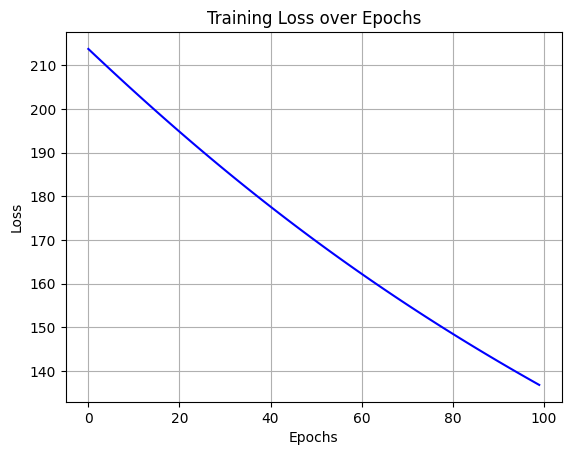

In [16]:
import matplotlib.pyplot as plt

# 绘制损失变化图
plt.plot(range(epochs), losses, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()


# 五、CPU在大模型训练中的应用

##  1. CPU的局限性 

CPU不适合处理大规模模型训练，尤其是在需要大量并行计算的深度学习任务中。

##### 示例代码

In [3]:
import numpy as np
# 在CPU上进行简单的矩阵乘法
matrix_a = np.random.rand(1000, 1000)
matrix_b = np.random.rand(1000, 1000)
result = np.dot(matrix_a, matrix_b)
print(result)

[[241.59283111 244.70179239 247.95992922 ... 242.45441061 240.12995108
  249.91171339]
 [229.17099532 231.12275689 239.57467874 ... 245.38419956 230.56513585
  242.76607168]
 [238.46746775 240.7919332  239.47910751 ... 241.08392305 235.11919223
  252.27266995]
 ...
 [248.72759869 256.38801606 255.80655391 ... 254.16641635 250.74934852
  267.97225434]
 [244.81850807 252.99004769 252.00132745 ... 258.49993267 245.59467965
  259.39691964]
 [241.46319947 247.96484858 246.40414231 ... 253.23162109 242.20439081
  250.3512321 ]]


## 2. 如何优化CPU训练

通过多核CPU并行处理，我们可以提高训练效率，适合小型模型的训练任务。

##### 示例代码

In [ ]:
import multiprocessing as mp
def worker(task):
    # 这里处理每个任务
    pass

# 创建多个进程
processes = [mp.Process(target=worker, args=(i,)) for i in range(4)]
for p in processes:
    p.start()
for p in processes:
    p.join()

# 六 、推理所需显存和速度

8bit量化模型： 参数量1B 占用 1G 显存以上。

比如：
- 8bit量化 7B模型，显存占用 7G 以上
- 4bit量化 7B模型，显存占用 3.5G 以上
- float16 7B模型，显存占用 14G 以上

## 低配使用（计算资源有限）

Int4量化，约2K上下文

<table align="left">
<thead>
<tr>
<th style="text-align:center">模型（int4）</th>
<th style="text-align:center">所需显存GB</th>
<th>推荐GPU</th>
<th>参考模型</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">0.5B</td>
<td style="text-align:center">&lt;5G</td>
<td></td>
<td>Qwen2-0.5B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">1.5B</td>
<td style="text-align:center">&lt;3G</td>
<td></td>
<td>Qwen-1_8B-Chat, Qwen2-1.5B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">6B</td>
<td style="text-align:center">4G</td>
<td></td>
<td>Yi-6B-Chat-4bits</td>
</tr>
<tr>
<td style="text-align:center">7B</td>
<td style="text-align:center">&lt;11G</td>
<td></td>
<td>Qwen2-7B-Instruct，Qwen-7B-Chat-Int4</td>
</tr>
<tr>
<td style="text-align:center">14B</td>
<td style="text-align:center">13G</td>
<td></td>
<td>Qwen-14B-Chat-Int4</td>
</tr>
<tr>
<td style="text-align:center">34B</td>
<td style="text-align:center">20G</td>
<td></td>
<td>Yi-34B-Chat-4bits</td>
</tr>
<tr>
<td style="text-align:center">57B</td>
<td style="text-align:center">&lt;35G</td>
<td></td>
<td>Qwen2-57B-A14B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">72B</td>
<td style="text-align:center">&lt;47G</td>
<td></td>
<td>Qwen2-72B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">130B</td>
<td style="text-align:center">-</td>
<td>8 * RTX 2080 Ti(11G) <br> 4 * RTX 3090(24G)</td>
<td>GLM-130B</td>
</tr>
<tr>
<td style="text-align:center">236B</td>
<td style="text-align:center">130G</td>
<td>8xA100(80G)</td>
<td>DeepSeek-V2-Chat</td>
</tr>
</tbody>
</table>

## （标配）中配使用（性能与资源平衡用法）
Int8量化，4k，6k上下文

<table align="left">
<thead>
<tr>
<th style="text-align:center">模型（int8）</th>
<th style="text-align:center">所需显存GB</th>
<th>推荐GPU</th>
<th>参考模型</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">0.5B</td>
<td style="text-align:center">6G</td>
<td></td>
<td>Qwen2-0.5B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">1.5B</td>
<td style="text-align:center">8G</td>
<td></td>
<td>Qwen2-1.5B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">6B</td>
<td style="text-align:center">8G</td>
<td></td>
<td>Yi-6B-Chat-8bits</td>
</tr>
<tr>
<td style="text-align:center">7B</td>
<td style="text-align:center">14G</td>
<td></td>
<td>Qwen2-7B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">14B</td>
<td style="text-align:center">27G</td>
<td></td>
<td>Qwen-14B-Chat-Int8</td>
</tr>
<tr>
<td style="text-align:center">34B</td>
<td style="text-align:center">38G</td>
<td></td>
<td>Yi-34B-Chat-8bits</td>
</tr>
<tr>
<td style="text-align:center">57B</td>
<td style="text-align:center">117G (bf16)</td>
<td></td>
<td>Qwen2-57B-A14B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">72B</td>
<td style="text-align:center">80G</td>
<td></td>
<td>Qwen2-72B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">130B</td>
<td style="text-align:center">-</td>
<td>8xRTX3090 (24G)</td>
<td>GLM-130B</td>
</tr>
<tr>
<td style="text-align:center">236B</td>
<td style="text-align:center">490G(fb16)</td>
<td>8xA100 (80G)</td>
<td>DeepSeek-V2-Chat</td>
</tr>
<tr>
<td style="text-align:center">340B</td>
<td style="text-align:center">-</td>
<td>16xA100(80G) <br>  16xH100(80G) <br>  8xH200</td>
<td>Nemotron-4-340B-Instruct</td>
</tr>
</tbody>
</table>

## 高配使用（高级用法，性能优先）
性能优先，不量化，数据格式FB16，32K上下文

<table align="left">
<thead>
<tr>
<th style="text-align:center">模型（fb16）</th>
<th style="text-align:center">所需显存GB</th>
<th>推荐GPU</th>
<th>参考模型</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">0.5B</td>
<td style="text-align:center">27G</td>
<td></td>
<td>Qwen2-0.5B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">1.5B</td>
<td style="text-align:center">30G</td>
<td></td>
<td>Qwen2-1.5B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">6B</td>
<td style="text-align:center">20G</td>
<td></td>
<td>Yi-6B-200K</td>
</tr>
<tr>
<td style="text-align:center">7B</td>
<td style="text-align:center">43G</td>
<td></td>
<td>Qwen2-7B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">14B</td>
<td style="text-align:center">39G(8k)</td>
<td></td>
<td>Qwen-14B-Chat</td>
</tr>
<tr>
<td style="text-align:center">34B</td>
<td style="text-align:center">200G(200k)</td>
<td>4 x A800 (80 GB)</td>
<td>Yi-34B-200K</td>
</tr>
<tr>
<td style="text-align:center">57B</td>
<td style="text-align:center">117G</td>
<td></td>
<td>Qwen2-57B-A14B-Instruct</td>
</tr>
<tr>
<td style="text-align:center">72B</td>
<td style="text-align:center">209G</td>
<td></td>
<td>Qwen2-72B-Instruct</td>
</tr>
</tbody>
</table>

# 七、GPU硬件选择策略

根据任务的规模和类型选择硬件：

- 应用场景：是用于深度学习训练、推理，还是科学计算、图形渲染？
  
- 模型规模：需要支持多大的模型（如几亿到几百亿参数）？
  
- 性能要求：对计算速度、吞吐量或延迟的要求是什么？
  
- 预算限制：硬件预算范围是多少？
  
- 软件兼容性：是否需要支持特定的框架（如TensorFlow、PyTorch）或CUDA版本？

**常见LLM用GPU显存一览表**

<table align="left">
<thead>
<tr>
<th>GPU</th>
<th style="text-align:center">显存</th>
</tr>
</thead>
<tbody>
<tr>
<td>H200</td>
<td style="text-align:center">141GB</td>
</tr>
<tr>
<td>H100 <br> H800</td>
<td style="text-align:center">80GB</td>
</tr>
<tr>
<td>A100 <br> A800</td>
<td style="text-align:center">80GB</td>
</tr>
<tr>
<td>A100</td>
<td style="text-align:center">40GB</td>
</tr>
<tr>
<td>V100</td>
<td style="text-align:center">32GB</td>
</tr>
<tr>
<td>RTXA6000</td>
<td style="text-align:center">48G</td>
</tr>
<tr>
<td>RTX4090 <br> RTX3090 <br> A10 <br>A30</td>
<td style="text-align:center">24GB</td>
</tr>
<tr>
<td>RTX4070</td>
<td style="text-align:center">12GB</td>
</tr>
<tr>
<td>RTX3070</td>
<td style="text-align:center">8GB</td>
</tr>
</tbody>
</table>

<img src="./model-gpu.png" style="margin-left: 0px" width="800px">
 

**附：Deepseek R1 GPU服务器推荐配置**

## DeepSeek-R1 系列模型硬件需求与适用场景

### 1. DeepSeek-R1-1.5B
- **CPU**: 最低 4 核（推荐 Intel/AMD 多核处理器）
- **内存**: 8GB+
- **硬盘**: 3GB+ 存储空间（模型文件约 1.5-2GB）
- **显卡**: 非必需（纯 CPU 推理），若 GPU 加速可选 4GB+ 显存（如 GTX 1650）

**适用场景**:
- 低资源设备部署（如树莓派、旧款笔记本）
- 实时文本生成（聊天机器人、简单问答）
- 嵌入式系统或物联网设备

---

### 2. DeepSeek-R1-7B
- **CPU**: 8 核以上（推荐现代多核 CPU）
- **内存**: 16GB+
- **硬盘**: 8GB+（模型文件约 4-5GB）
- **显卡**: 推荐 8GB+ 显存（如 RTX 3070/4060）

**适用场景**:
- 本地开发测试（中小型企业）
- 中等复杂度 NLP 任务（文本摘要、翻译）
- 轻量级多轮对话系统

---

### 3. DeepSeek-R1-8B
- **硬件需求**: 与 7B 相近，略高 10-20%

**适用场景**:
- 需更高精度的轻量级任务（如代码生成、逻辑推理）

---

### 4. DeepSeek-R1-14B
- **CPU**: 12 核以上
- **内存**: 32GB+
- **硬盘**: 15GB+
- **显卡**: 16GB+ 显存（如 RTX 4090 或 A5000）

**适用场景**:
- 企业级复杂任务（合同分析、报告生成）
- 长文本理解与生成（书籍/论文辅助写作）

---

### 5. DeepSeek-R1-32B
- **CPU**: 16 核以上（如 AMD Ryzen 9 或 Intel i9）
- **内存**: 64GB+
- **硬盘**: 30GB+
- **显卡**: 24GB+ 显存（如 A100 40GB 或双卡 RTX 3090）

**适用场景**:
- 高精度专业领域任务（医疗/法律咨询）
- 多模态任务预处理（需结合其他框架）

---

### 6. DeepSeek-R1-70B
- **CPU**: 32 核以上（服务器级 CPU）
- **内存**: 128GB+
- **硬盘**: 70GB+
- **显卡**: 多卡并行（如 2x A100 80GB 或 4x RTX 4090）

**适用场景**:
- 科研机构/大型企业（金融预测、大规模数据分析）
- 高复杂度生成任务（创意写作、算法设计）

---

### 7. DeepSeek-R1-671B
- **CPU**: 64 核以上（服务器集群）
- **内存**: 512GB+
- **硬盘**: 300GB+
- **显卡**: 多节点分布式训练（如 8x A100/H100）

**适用场景**:
- 国家级/超大规模 AI 研究（如气候建模、基因组分析）
- 通用人工智能（AGI）探索

---

## 通用建议
- **量化优化**: 使用 4-bit/8-bit 量化可降低显存占用 30-50%。
- **推理框架**: 搭配 vLLM、TensorRT 等加速库提升效率。
- **云部署**: 70B/671B 建议优先考虑云服务以弹性扩展资源。
- **能耗注意**: 32B+ 模型需高功率电源（1000W+）和散热系统。011